# ggplot2

R can produce high quality graphics using the ggplot2 package. The "gg" portion of the name comes from Leland Wilkinson's book *The Grammar of Graphics*, which is considered a classic in the field.

We'll explore scatter plots in detail to give you a feel for how ggplot2 works and then touch briefly on some other graphing and plotting methods. The learning curve for ggplot2 can be a little steeper than for some other plotting packages, but once you've mastered the fundamentals you'll appreciate the power of ggplot2. Two key points to keep in mind:

+ ggplot2 works on data frames
+ plots can be built up by adding successive layers

Let's revisit the mtcars data set and the relationship between horsepower (hp) and fuel efficiency (mpg) before illustrating how we can incorporate additional data into our scatter plots.

In [26]:
require("ggplot2")

In [27]:
head(mtcars,3)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1


We'll start by making a simple scatter plot, but first we'll use the options function to set the graphs to a convenient size. 

In [39]:
options(repr.plot.width=4, repr.plot.height=3)

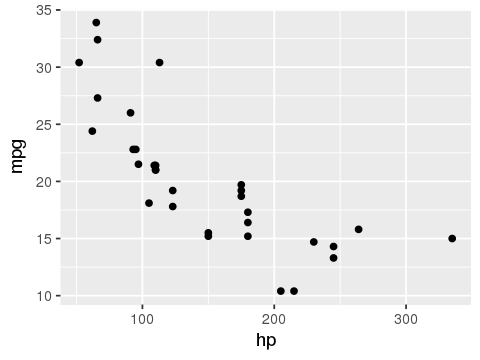

In [40]:
g <- ggplot(mtcars, aes(x=hp, y=mpg)) + geom_point()
plot(g)

A few comments on the previous cell

+ Note that we saved the plot as 'g' and then displayed using plot. We can go back later and add additional layers to g
+ The dataframe is the first argument to ggplot and we used an aesthetic mapping (aes) so that the hp and mpg columns serve as the x and y data
+ geom_point() adds the scatter plot layer to the graph

Starting with our previously saved plot, we can add another layer that contains a title, subtitle, x-axis label and y-axis label

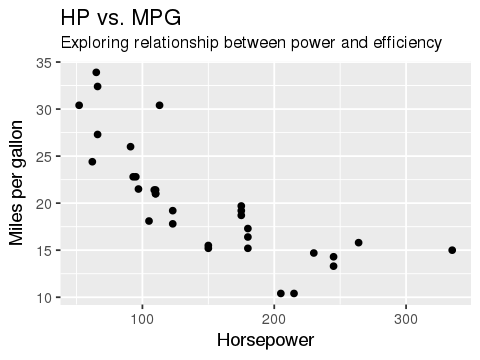

In [30]:
g <- g + labs(title="HP vs. MPG", subtitle="Exploring relationship between power and efficiency", 
              x="Horsepower", y="Miles per gallon")
plot(g)

## A brief digression - getting math formatting into figures

Unlike Python's matplotlib, ggplot2 doesn't have a convenient way of formatting math equations and special characters using LaTeX syntax. Instead it provides some limited functionality using the expression function as demonstrated below for the x and y axis labels.

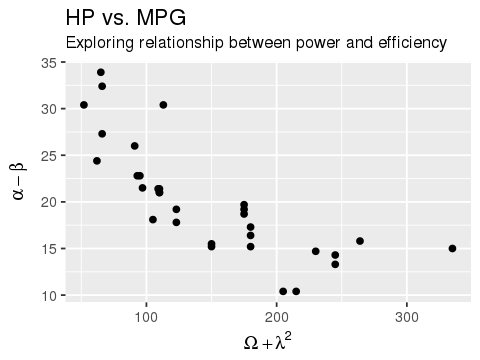

In [31]:
g <- g + labs(title="HP vs. MPG", subtitle="Exploring relationship between power and efficiency", 
              x=expression(Omega + lambda^2), y=expression(alpha - beta))
plot(g)

## A second brief digression - writing R statements over multiple lines

R has a clever way of handling code that runs over several lines. If no more arguments are required and all open parentheses are matched with closing parentheses, R will consider the expression complete. We can write multiline expressions by placing operators at the end of the line and/or making sure that closing parentheses are needed. We demonstrate this below, but note that we've already been taking advantage of this feature.

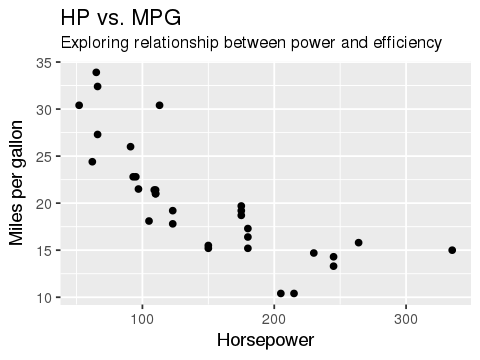

In [32]:
g <- ggplot(mtcars, aes(x=hp, y=mpg)) + 
geom_point() + 
labs(title="HP vs. MPG", 
    subtitle="Exploring relationship between power and efficiency", 
    x="Horsepower", 
    y="Miles per gallon")

plot(g)

## Changing the marker colors, shapes, sizes and alphas

The marker properties can be specified in the geom_point function. For reasons I don't fully understand, shapes are defined by numbers rather than meaningful names (see following for list of shapes http://www.cookbook-r.com/Graphs/Shapes_and_line_types/)

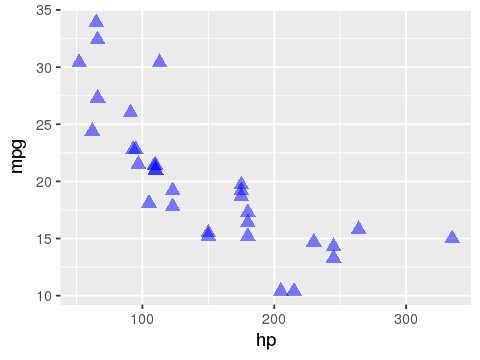

In [41]:
g <- ggplot(mtcars, aes(x=hp, y=mpg)) + 
geom_point(col="blue", size=3, shape=17, alpha=0.5)

plot(g)

The geom_point function also lets you vary the symbols properties based on the value of another column. Below, we color the markers according to the value of the cylinder column and the shape using the weight (wt) column. We first convert the cylinder column from a numeric value to a factor so that it will be treated as categorical data.

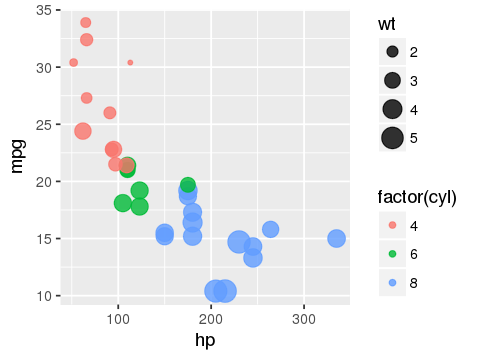

In [42]:
g <- ggplot(mtcars, aes(x=hp, y=mpg)) + 
geom_point(aes(size = wt, color = factor(cyl)), alpha=0.8)

plot(g)

We can introduce another variable into our plot by letting the marker shape depend on a column of the dataframe. In this case we'll use the "am" column, which specifies whether the car has an automatic transmission.

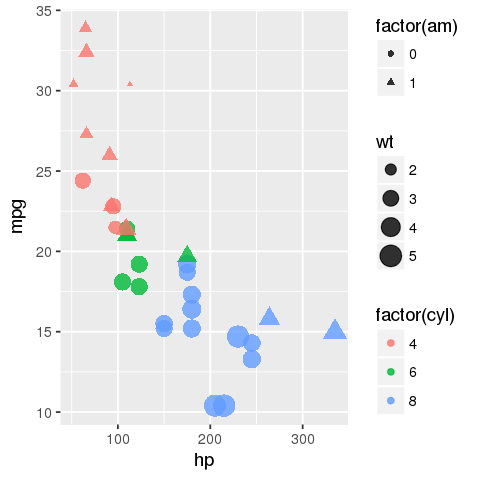

In [45]:
g <- ggplot(mtcars, aes(x=hp, y=mpg)) + 
geom_point(aes(size = wt, color = factor(cyl), shape = factor(am)), alpha=0.8)

options(repr.plot.width=4, repr.plot.height=4)
plot(g)
options(repr.plot.width=4, repr.plot.height=3)

Our scatter plot is now simultaneously displaying five variables

+ horsepower (hp) on x-axis
+ fuel efficiency (mpg) on y-axis
+ automatic transmission (am) using marker shape
+ weight (wt) using marker size
+ number of cylinders (cyl) using marker color

Is this too much information? Has the plot become too complex? You'll need to be the judge of this based on your knowledge of the data and the intended audience.

## Changing the axis limits

Axis limits are set using the coord_cartesion function

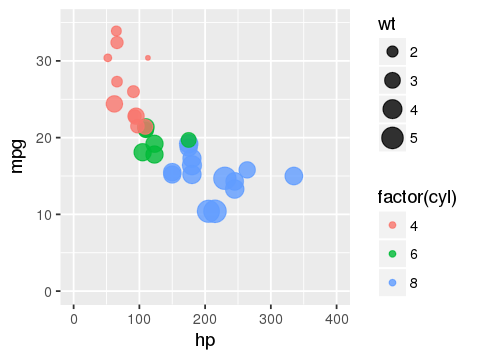

In [46]:
g <- ggplot(mtcars, aes(x=hp, y=mpg)) + 
geom_point(aes(size = wt, color = factor(cyl)), alpha=0.8) +
coord_cartesian(xlim=c(0,400), ylim=c(0, 35))

plot(g)

## Changing the color palettes

The RColorBrewer package contains a collecion of useful color palettes. More information on these palettes can be found here https://moderndata.plot.ly/create-colorful-graphs-in-r-with-rcolorbrewer-and-plotly/.

To set the color palette, use the scale_colour_brewer function.

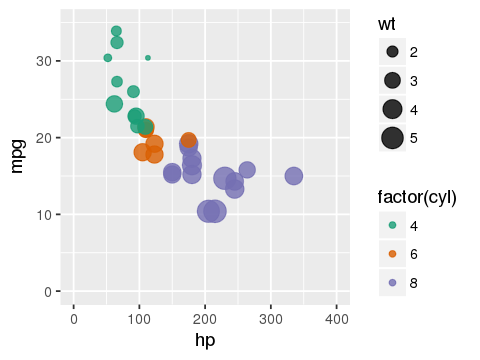

In [47]:
library(RColorBrewer)

g <- ggplot(mtcars, aes(x=hp, y=mpg)) + 
geom_point(aes(size = wt, color = factor(cyl)), alpha=0.8) +
coord_cartesian(xlim=c(0,400), ylim=c(0, 35)) +
scale_colour_brewer(palette = "Dark2")

plot(g)

## Adding a smoothing layer

A fit of the data with a shaded band denoting the confidence interval can be added to the graph using the geom_smooth function. By default, the loess method with a confidence interval of 0.95 is used.

`geom_smooth()` using method = 'loess'


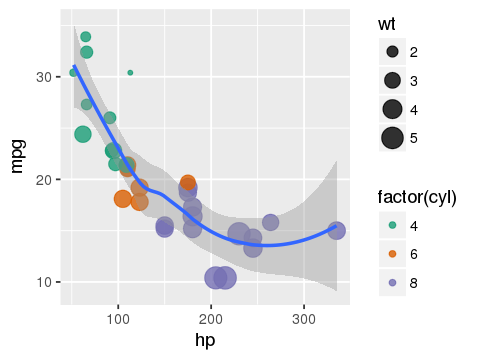

In [48]:
g <- ggplot(mtcars, aes(x=hp, y=mpg)) + 
geom_point(aes(size = wt, color = factor(cyl)), alpha=0.8) +
scale_colour_brewer(palette = "Dark2") +
geom_smooth()

plot(g)

We can override the default by setting the method and level. In the example below, we use a linear model with a confidence interval of 0.8.

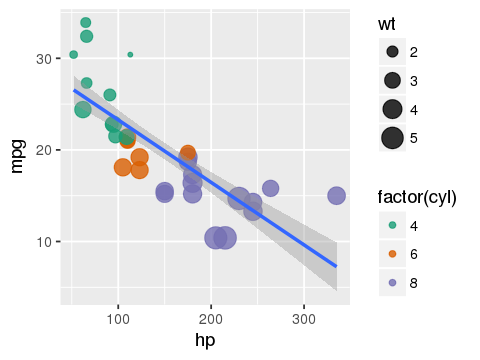

In [49]:
g <- ggplot(mtcars, aes(x=hp, y=mpg)) + 
geom_point(aes(size = wt, color = factor(cyl)), alpha=0.8) +
scale_colour_brewer(palette = "Dark2") +
geom_smooth(method="lm", level=0.8)

plot(g)

## Changing axis ticks and tick locations

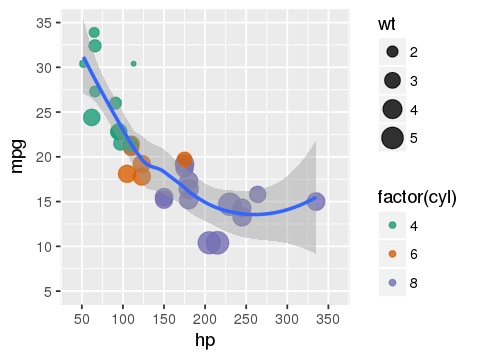

In [50]:
g <- ggplot(mtcars, aes(x=hp, y=mpg)) + 
geom_point(aes(size = wt, color = factor(cyl)), alpha=0.8) +
scale_colour_brewer(palette = "Dark2") +
geom_smooth(method="loess") +
coord_cartesian(xlim=c(40,360), ylim=c(5,35)) +
scale_x_continuous(breaks=seq(0, 350, 50)) + 
scale_y_continuous(breaks=seq(0, 40, 5))

plot(g)

## Just scratching the surface

The ggplot2 package is incredibly powerful and gives you fine-grained control over all aspects of the appearance of your figure. Although it feels like we've gone into great depth with our scatter plot example, we've barely scratched the surface. My advice is that you master the fundamentals of ggplot2 and incrementally build your knowledge by experimenting with new plotting methods and customizing the appearance of plot elements.

Remember that R and ggplot2 have many built-in data sets that you can use for your plotting experiments. A full listing of all built-in data sets and their associated packages is obtained with the data() command. Data sets that are part of the base R distribution will be listed as belonging to the datasets package.

In [56]:
data()

## A few more examples

Without going into any details, we show a few simple examples of other plot types that can be created using R. Much of the functionality that we covered for scatter plots can also be applied to these plot types. 

A useful master list of ggplot2 visualizations and ggplot2 reference can be found at the following URLs

http://r-statistics.co/Top50-Ggplot2-Visualizations-MasterList-R-Code.html  
http://ggplot2.tidyverse.org/reference/

### Box plots (with and without individual points displayed)

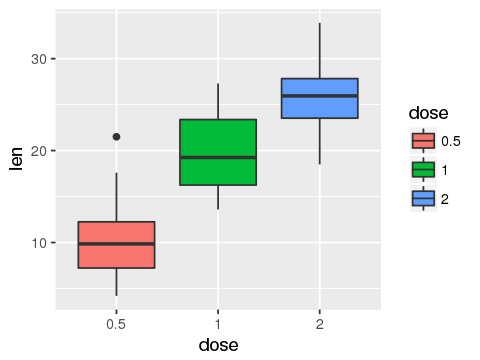

In [65]:
ToothGrowth$dose <- as.factor(ToothGrowth$dose) # converting to factor

g_bp <- ggplot(ToothGrowth, aes(x=dose, y=len, fill=dose)) + 
geom_boxplot()

plot(g_bp)

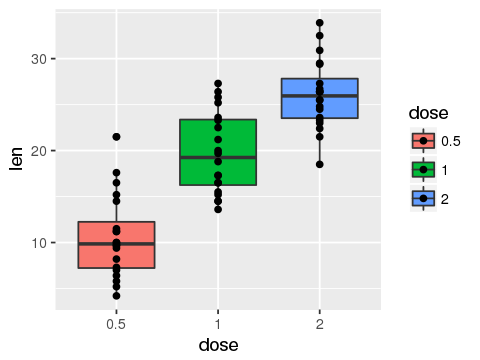

In [66]:
g_bp <- ggplot(ToothGrowth, aes(x=dose, y=len, fill=dose)) + 
geom_boxplot() + 
geom_point()

plot(g_bp)

### Bar chart

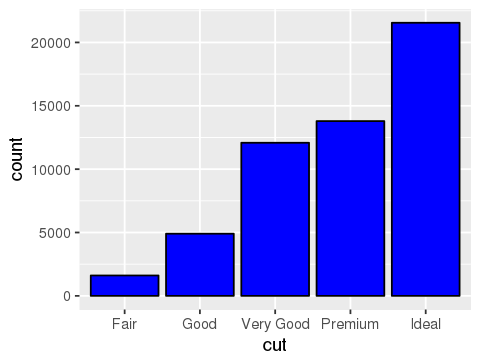

In [89]:
g_b <- ggplot(diamonds, aes(x=cut)) +
geom_bar(col="black", fill="blue")

plot(g_b)

### Histogram

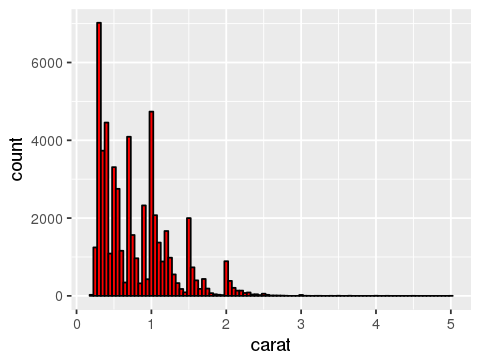

In [87]:
data(diamonds)
g_h <- ggplot(diamonds, aes(x=carat)) +
geom_histogram(col="black", fill="red", binwidth=0.05)

plot(g_h)